In [5]:
# Imports which i took from the model_evaluation notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
import warnings
warnings.simplefilter(action="ignore")

In [24]:
#importing the file
df = pd.read_pickle("data/EDA.pkl")  

In [26]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...
16507,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16508,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16509,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16510,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


## baseline

In [27]:
#defining x and y for the dummy model
y = df["median_house_value"]
x = df.drop("median_house_value", axis=1)

In [28]:
# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(x, y)

# calculate the score
dummy_clf.score(x, y)

0.006458022851465474

## first iteration model

In [62]:
y = df["median_house_value"]
x = df.drop("median_house_value", axis=1)

In [63]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.5748794716376548

### evaluation

In [64]:
#taking the funciton form the model evaluation notebook to calculate how many folds are the most efficient
K = []
total_time = []
score = []

for k in range(2,40):
    cross_val_results = cross_validate(model, x, y, cv=k)
    total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
    K.append(k)
    score.append(cross_val_results['test_score'].mean())

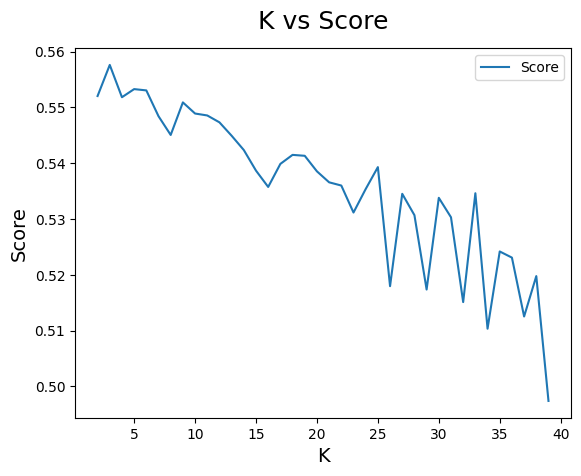

In [65]:
#plotting it
plt.plot(K, score, label = 'Score')
plt.ylabel('Score', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.title('K vs Score', fontsize = 18, y = 1.03)
plt.legend()

In [68]:
# evaluating my model using cross validation with 15 folds
cv_results = cross_validate(model, 
                            x, y, 
                            cv=3
                           )
cv_results

{'fit_time': array([0.00874186, 0.00345469, 0.0054667 ]),
 'score_time': array([0.00391293, 0.00263691, 0.00192761]),
 'test_score': array([0.56612937, 0.54166344, 0.56508423])}

In [69]:
#mean of the test score
cv_results['test_score'].mean()

0.5576256771670192